# Feature Engineering

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing # puts the features in standard format
from sklearn import pipeline 
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Import Dataframe

In [2]:
df = pd.read_csv('csv_files/12_12_DF_log_state_FINAL.csv')

### Initial look at dataframe

In [3]:
df.tail()

,Life Expectancy,Percent Smokers,Percent Obese,Unemployment_rate_2010,log_food_stamps,Alaska,Arizona,Arkansas,California,Colorado,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies
2978,0.102956,0.306336,-0.751646,-0.877782,-0.773864,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2979,2.342667,-2.827030,-4.134520,-0.530616,-0.509604,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2980,-0.084430,-0.398064,-0.183891,-0.751540,-5.517516,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2981,0.477728,-0.422354,-1.532309,-1.098706,1.532639,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2982,0.419728,0.063440,0.170956,-1.445873,-0.972225,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Test, Train, Split

In [38]:
# the target is panda series of the dependent variable
target = df['Life Expectancy'] 

# make dataframe of just feature, or independent variables
features = df.drop(columns=['Life Expectancy']) # taking target out of dataframe

# look at features dataframe
features.tail()

,Percent Smokers,Percent Obese,Unemployment_rate_2010,log_food_stamps,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies
2978,0.306336,-0.751646,-0.877782,-0.773864,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2979,-2.827030,-4.134520,-0.530616,-0.509604,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2980,-0.398064,-0.183891,-0.751540,-5.517516,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2981,-0.422354,-1.532309,-1.098706,1.532639,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2982,0.063440,0.170956,-1.445873,-0.972225,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
# split the data to train and test our model
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=32,test_size=0.2)


In [42]:
# check the length of our train and test dataframes

print(' Length of ',
    '\n Feautures Training Data:',len(X_train),
    '\n Features Test Data:', len(X_test), 
    '\n Target Training Data:', len(y_train),
    '\n Target Test Data:', len(y_test))

 Length of  
 Feautures Training Data: 2386 
 Features Test Data: 597 
 Target Training Data: 2386 
 Target Test Data: 597


## Ordinary Least Squares

Using the sum of the squared differences between our features (the observed dependent features), such as percent of the population that are smokers per county and percent of that population that is obese, we calculated the error.

In [36]:
# set the X_train dataframe to a variable to build a linear regression model with
predictors = X_train #features

# add constant term to predictors
predictors_int = sm.add_constant(predictors)

# make a model based on OLS
model = sm.OLS(y_train,predictors_int).fit()#sm.OLS(df['Life Expectancy'],predictors_int).fit()

# print out a summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     184.8
Date:                Sun, 16 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:19:33   Log-Likelihood:                -1410.9
No. Observations:                2386   AIC:                             2930.
Df Residuals:                    2332   BIC:                             3242.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.5831      0.061     -9.512      0.000      -0.703      -0.463
Percent Smokers           -0.4866      0.015    -32.956      0.000      -0.516      -0.458
Percent Obese             -0.2553      0.015    -17.191      0.000      -0.284      -0.226
Unemployment_rate_2010    -0.1491      0.016     -9.576      0.000      -0.180      -0.119
log_food_stamps            0.0016      0.010      0.163      0.870      -0.017       0.021
Alaska                     0.3464      0.136      2.541      0.011       0.079       0.614
Arizona                    0.0238      0.127      0.187      0.852      -0.226       0.273
Arkansas                   0.2119      0.087      2.445      0.015       0.042       0.382
California                -0.2368      0.074     -3.199      0.001      -0.382      -0.092
Colorado                  -0.1365      0.069     -1.974      0.049      -0.272      -0.001
Connecticut                0.0833      0.158      0.527      0.598      -0.227       0.393
Delaware                   0.7490      0.319      2.350      0.019       0.124       1.374
Florida                    0.0140      0.064      0.217      0.828      -0.112       0.140
Georgia                   -0.0161      0.073     -0.221      0.825      -0.159       0.126
Hawaii                     0.9792      0.320      3.057      0.002       0.351       1.607
Idaho                      0.7217      0.097      7.421      0.000       0.531       0.912
Illinois                   0.7933      0.079     10.053      0.000       0.639       0.948
Indiana                    0.9515      0.080     11.927      0.000       0.795       1.108
Iowa                       1.1300      0.082     13.806      0.000       0.969       1.290
Kansas                     0.7538      0.081      9.317      0.000       0.595       0.912
Kentucky                   0.5526      0.076      7.225      0.000       0.403       0.703
Louisiana                  0.1696      0.095      1.791      0.073      -0.016       0.355
Maine                      0.1872      0.133      1.404      0.161      -0.074       0.449
Maryland                   0.4315      0.138      3.137      0.002       0.162       0.701
Massachusetts              0.0433      0.123      0.353      0.724      -0.197       0.284
Michigan                   1.3400      0.081     16.461      0.000       1.180       1.500
Minnesota                  1.3435      0.083     16.122      0.000       1.180       1.507
Mississippi               -0.2033      0.079     -2.562      0.010      -0.359      -0.048
Missouri                   0.9216      0.079     11.637      0.000       0.766       1.077
Montana                    0.3538      0.096      3.674      0.000       0.165       0.543
Nebraska                   0.9589      0.086     11.134      0.000       0.790  

In [54]:
# predict y values
y_ols_pred = model.predict(sm.add_constant(X_test))


Text(0,0.5,'Predicted Values from OLS')

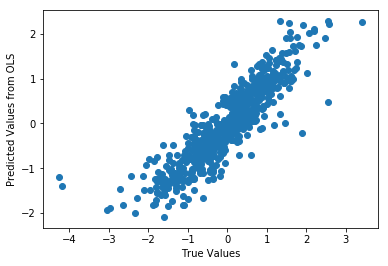

In [63]:
# plot the predicted y-value vs the true-value 
plt.scatter(y_test, y_ols_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values from OLS')

## Scikit-learn regression

In [33]:
# set the y variable to Life Expectancy
y = df['Life Expectancy']

# set the linear regression method to a variable
linreg = LinearRegression()

# fit a linear regression to the predictors and life expectancy
linreg.fit(predictors, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
# get coefficients of the linear regression
print(linreg.coef_ ,  '\n There are',len(linreg.coef_),'coefficients for the linear regression','\n the y-intercept is ', linreg.intercept_)
print('The model is a ', type(linreg))
print('The R-squared value is ', linreg.score(X_train, y_train), 'which maps to the OLS R-squared value of .808')

# predict the y value from the linear regression model
y_pred = linreg.predict(X_test)


[-4.86631980e-01 -2.55264262e-01 -1.49128383e-01  1.47479256e-03
  4.41430386e+11  4.41430386e+11  2.11805440e-01  4.41430386e+11
  4.41430386e+11  4.41430386e+11  7.47295380e-01  4.41430386e+11
 -1.60980225e-02  9.79285479e-01  7.21328735e-01  7.93003082e-01
  9.51675415e-01  1.12985229e+00  7.53631592e-01  5.52490234e-01
  1.69059753e-01  4.41430386e+11  4.31159973e-01  4.41430386e+11
  1.33975220e+00  1.34307861e+00 -2.03704834e-01  9.21966553e-01
  3.53683472e-01  9.58770752e-01  4.90898132e-01  7.22152710e-01
  4.62600708e-01  4.41430386e+11  8.97583008e-01  4.36992645e-01
  1.13577271e+00  4.41430386e+11  1.91864014e-01  4.41430386e+11
  9.36656952e-01  4.41430386e+11  1.35070801e-01  8.86230469e-01
  1.77947998e-01  8.71582031e-02 -1.27182007e-02  5.10681152e-01
  4.44664001e-01  4.41430386e+11  6.94854736e-01  1.19866943e+00
  3.22521210e-01 -4.41430386e+11] 
 There are 54 coefficients for the linear regression 
 the y-intercept is  -0.5830036474608896
The model is a  <class 's

Text(0,0.5,'Predicted Values')

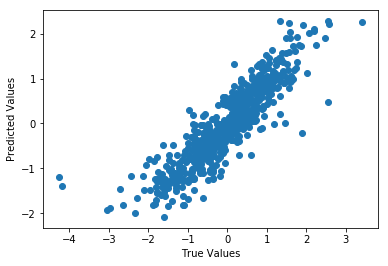

In [25]:
# plot the predicted y-value vs the true-value 
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Feature Selection

## Using Filter Methods

## Applying a Wrapper Method to Filtered features

## Creating Interact and Polynomial Terms

In [ ]:
# maybe, depending on how our regression looks

# Final Thoughts